In [1]:
# ===== Include all needed libraries / packages =====


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ===== Import list of frequencies & dataframes from csv files =====


# Specify the directory where the CSV files are
directory = './output_csv_data/'

# Create a list of frequencies (int)
list_of_freq_mhz = np.arange(139, 146)

# Specify a list of all CSV filenames in the directory
csv_files = []
for freq_mhz in list_of_freq_mhz:
    csv_files = np.append(csv_files, 'data_' + str(freq_mhz) + 'mhz.csv')


# Create a list of DataFrames
list_of_dfs = [pd.read_csv(os.path.join(directory, f)) for f in csv_files]

In [3]:
# ===== Calculate Total Gain =====

# This section is empty because the calculation is already done in src_0_data_generator.ipynb

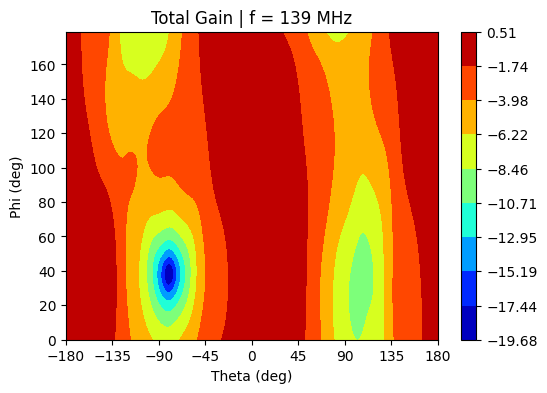

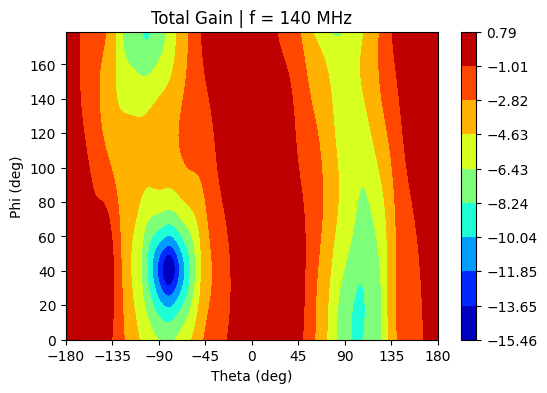

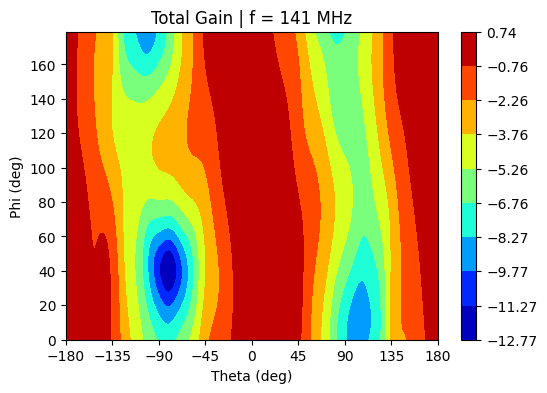

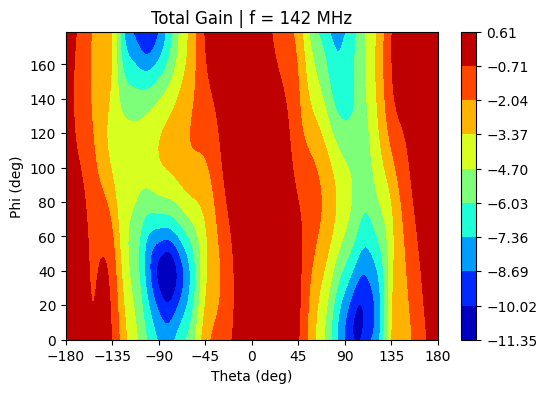

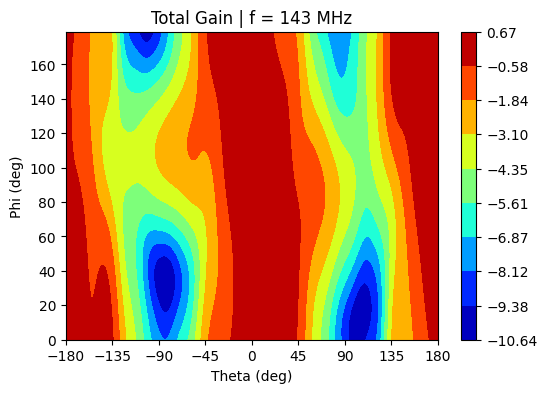

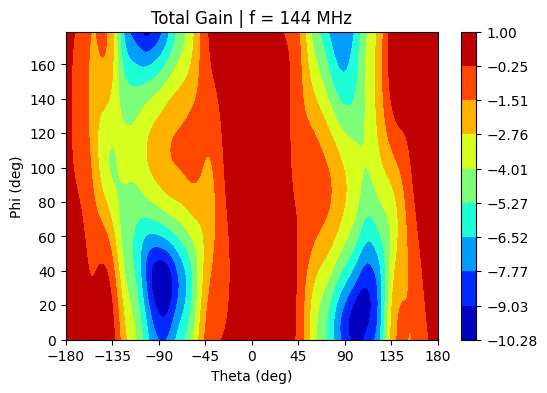

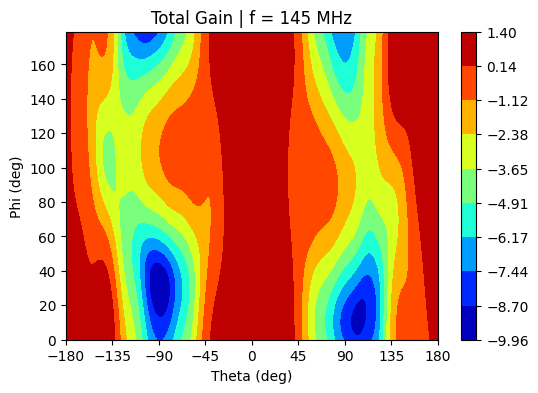

In [4]:
# ===== Plotting =====

%matplotlib inline

for index, df in enumerate(list_of_dfs):
    X, Y = np.meshgrid(np.linspace(-180, 180, 361), np.linspace(0, 179, 180))
    Z = df.Gain_Total.values.flatten().reshape(180, 361)
    Z[Z < -30] = -30 # Filter value that large than -30
    levels = np.linspace(np.min(Z), np.max(Z), 10)
    
    fig, ax = plt.subplots(figsize=(6, 4))
    cs = ax.contourf(X, Y, Z, levels=levels, cmap='jet')
    ax.set_xticks(np.arange(-180, 181, 45))
    
    plt.colorbar(cs)
    plt.title('Total Gain | f = ' + str(list_of_freq_mhz[index]) + ' MHz')
    plt.xlabel('Theta (deg)')
    plt.ylabel('Phi (deg)')

    plt.savefig(("output_plot/gain_total_theta_vs_phi/gain_total_theta_vs_phi_freq_" + str(list_of_freq_mhz[index]) + ".pdf"), format='pdf', dpi=600)
    
    plt.show()